# Naive Bayes Project Tutorial

## Sentiment analysis

In [1]:
import pandas as pd
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
total_data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


Study of variables and their content

In [2]:
#Removing the "package_name" variable
data = total_data.drop('package_name', axis=1)


In [3]:
data.head()


,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


In [4]:
#Removing spaces and converting the text to lowercase
data["review"] = data["review"].str.strip().str.lower()

In [5]:
from sklearn.model_selection import train_test_split

#Splitting data intro train and test
predictora = 'review'
target = 'polarity'

X = data[predictora]
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 8)

X_train.head()

431    useful and well designed, however glitchy the ...
619    pls fix these bugs : when ever u  set the sear...
708    one issue.big files downloading very slow i ca...
809    good as far as i have it fast and reliable. fo...
5      idk i can't edit my posts? things such as my p...
Name: review, dtype: object

In [6]:
X_train.to_csv("/workspaces/machine-learning-naive-bayes-algorithm/data/processed/X_train.csv", index = False)
y_train.to_csv("/workspaces/machine-learning-naive-bayes-algorithm/data/processed/y_train.csv", index = False)
X_test.to_csv("/workspaces/machine-learning-naive-bayes-algorithm/data/processed/X_test.csv", index = False)
y_test.to_csv("/workspaces/machine-learning-naive-bayes-algorithm/data/processed/y_test.csv", index = False)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#Transforming the text into a word count matrix

vec_model = CountVectorizer(stop_words = "english")
X_train_vec = vec_model.fit_transform(X_train).toarray()
X_test_vec = vec_model.transform(X_test).toarray()



Build a naive bayes model

In [8]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
y_pred

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)



0.832089552238806

Trying as well the Gaussian and the Bernoulli models.

In [9]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
y_pred

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)



0.7723880597014925

In [10]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
y_pred

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8097014925373134

The model with better results is the Multinomial, so we will use this one for optimization.

In [11]:
#Model optimization

#Random search

import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "alpha": np.linspace(0.1, 15, 150),
    "fit_prior": [True, False]
    }

In [12]:
# We initialize the random search
model = MultinomialNB()
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 8)
random_search

random_search.fit(X_train_vec, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'fit_prior': False, 'alpha': 3.7}


In [13]:
model_random_search = MultinomialNB(alpha= 3.7, fit_prior= False)
model_random_search.fit(X_train_vec, y_train)
y_pred = model_random_search.predict(X_test_vec)

In [14]:
random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.8208955223880597

I tried a few combinations, but I did not get a better result by optimizing.

In [15]:

from pickle import dump

dump(model, open("/workspaces/machine-learning-naive-bayes-algorithm/models/multinomialNB_alpha-3.7_fitprior-false.sav", "wb"))

### Trying other models

In [16]:
#Logistic regression
#Initialization and training of the model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=8)
model.fit(X_train_vec, y_train)


LogisticRegression(random_state=8)

In [17]:

#Model prediction
y_pred = model.predict(X_test_vec)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7835820895522388

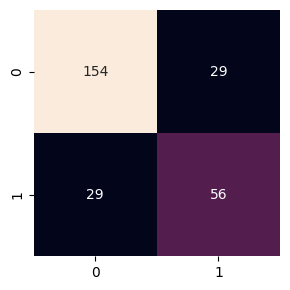

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

titanic_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(titanic_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [19]:
#Model optimization

#Grid search
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 50, 100],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

In [20]:
# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_vec, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'lbfgs'}


In [21]:

model_grid = LogisticRegression(penalty = None, C = 0.001, solver = "lbfgs", random_state= 8)
model_grid.fit(X_train_vec, y_train)
y_pred = model_grid.predict(X_test_vec)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy



0.7761194029850746

In [22]:
from pickle import dump

dump(model_grid, open("../models/logistic_regression_C-0.001_penalty-none_solver-lbfgs_8.sav", "wb"))

The results have not improved after trying with Logistic Regression.

In [23]:
#Boosting
#Initialization and training of the model

from xgboost import XGBClassifier
model = XGBClassifier(random_state = 8)
model.fit(X_train_vec, y_train)


#Model prediction
y_pred = model.predict(X_test_vec)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)




0.7388059701492538

In [24]:
#Model optimization

#Grid search
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "n_estimators": [50, 80, 100],
    "learning_rate": [0.01, 0.05, 0.1],
    "gamma": [0, 0.5, 1, 5],
    "subsample": [0.5, 0.8, 1.0],
    "max_depth": [3, 4, 5, 6],
    "min_child_weight": [1, 5, 10],
    }

In [25]:
# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_vec, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


In [29]:
model_grid = XGBClassifier(random_state = 8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0)
model_grid.fit(X_train_vec, y_train)
y_pred = model_grid.predict(X_test_vec)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy


0.7425373134328358

The optimization of the Boosting has improved the performance (from 0.7388059701492538 to 0.7425373134328358) but not the one we got with the Naive Bayes model.

In [30]:

from pickle import dump

dump(model_grid, open("../models/XGBClassifier_gamma-05_learningrate-01_maxdepth-5_minchildweight-1_estimators-100_subsample-1_8.sav", "wb"))

